1)

FFT computation time: 0.0008528232574462891 seconds
DFT computation time: 1.906097173690796 seconds


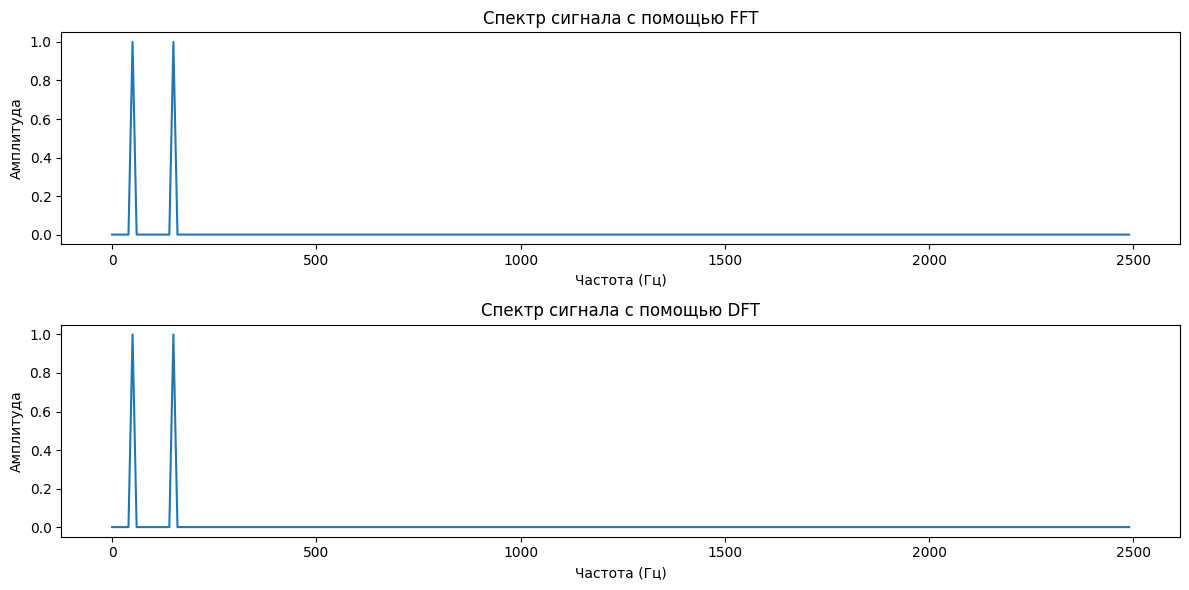

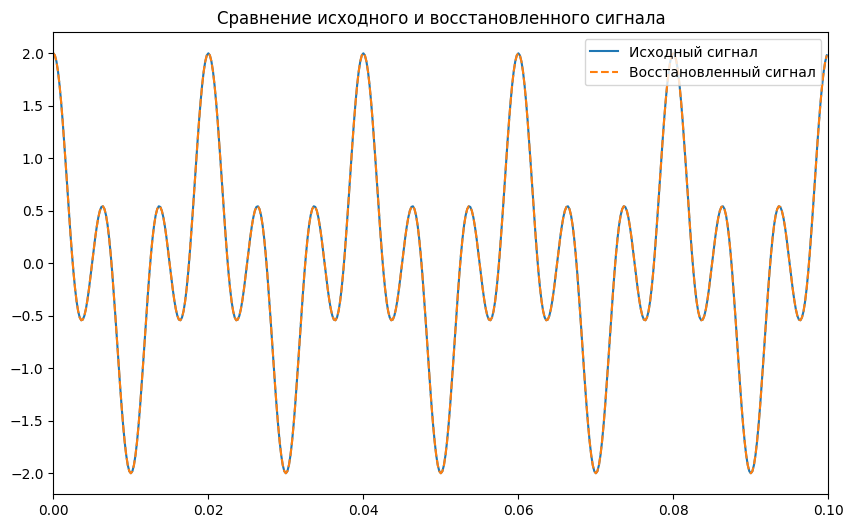

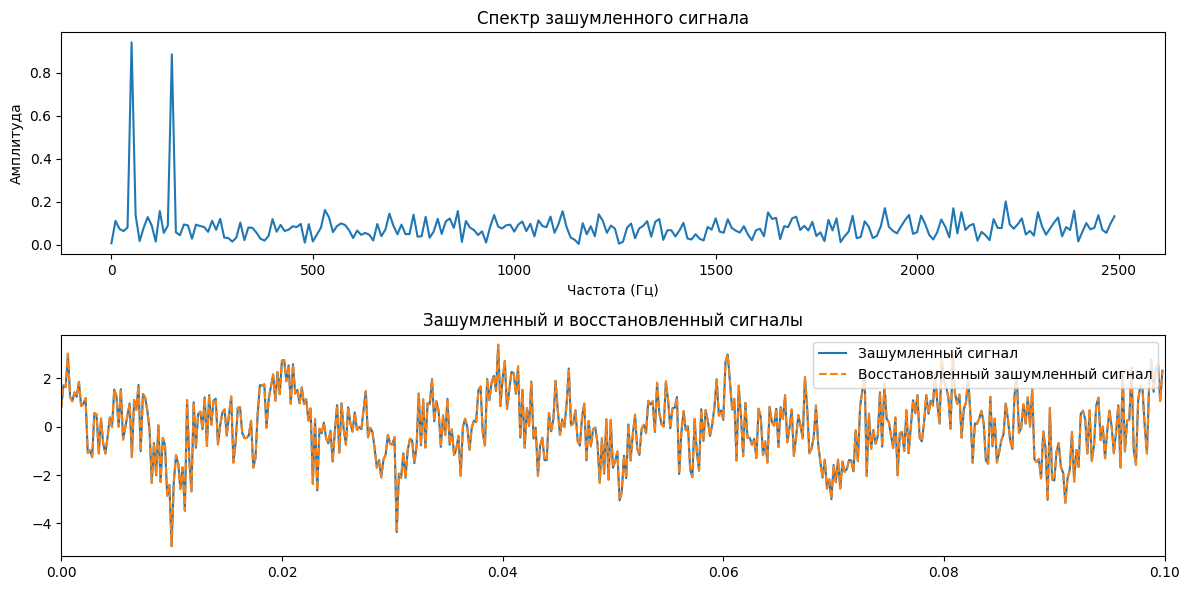

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import time

# Параметры сигнала
sampling_frequency = 5000  # Частота дискретизации (Гц)
sampling_period = 1.0 / sampling_frequency
duration = 0.1
t = np.arange(0, duration, sampling_period)  # Временная ось (1 секунда)

# Сигнал из суммы двух косинусов
f1 = 50
f2 = 150
signal = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# а)
# Быстрое преобразование Фурье (FFT)
start_time_fft = time.time()
fft_signal = fft(signal)
fft_time = time.time() - start_time_fft

# Функция для ручного вычисления дискретного преобразования Фурье (DFT)
def DFT_show(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

start_time_dft = time.time()
dft_signal = DFT_show(signal)
dft_time = time.time() - start_time_dft


print(f"FFT computation time: {fft_time} seconds")
print(f"DFT computation time: {dft_time} seconds")

frequencies = np.fft.fftfreq(len(t), sampling_period)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal[:len(fft_signal)//2]) * 2 / len(t))
plt.title('Спектр сигнала с помощью FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(dft_signal[:len(dft_signal)//2]) * 2 / len(t))
plt.title('Спектр сигнала с помощью DFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

# б)
recovered_signal = ifft(fft_signal)
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Исходный сигнал")
plt.plot(t, recovered_signal.real, label="Восстановленный сигнал", linestyle='--')
plt.xlim(0, duration)
plt.title("Сравнение исходного и восстановленного сигнала")
plt.legend(loc='upper right')
plt.show()

# в)
plt.figure(figsize=(12, 6))
noisy_signal = signal + np.random.normal(0, 1, signal.shape) * 1
fft_noisy_signal = fft(noisy_signal)
plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_noisy_signal[:len(fft_noisy_signal)//2]) * 2 / len(t))
plt.title("Спектр зашумленного сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")

recovered_noisy_signal = ifft(fft_noisy_signal)
plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal, label="Зашумленный сигнал")
plt.plot(t, recovered_noisy_signal.real, label="Восстановленный зашумленный сигнал", linestyle='--')
plt.xlim(0, duration)
plt.title("Зашумленный и восстановленный сигналы")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

2)

FFT computation time: 0.0016586780548095703 seconds
DFT computation time: 5.0576722621917725 seconds


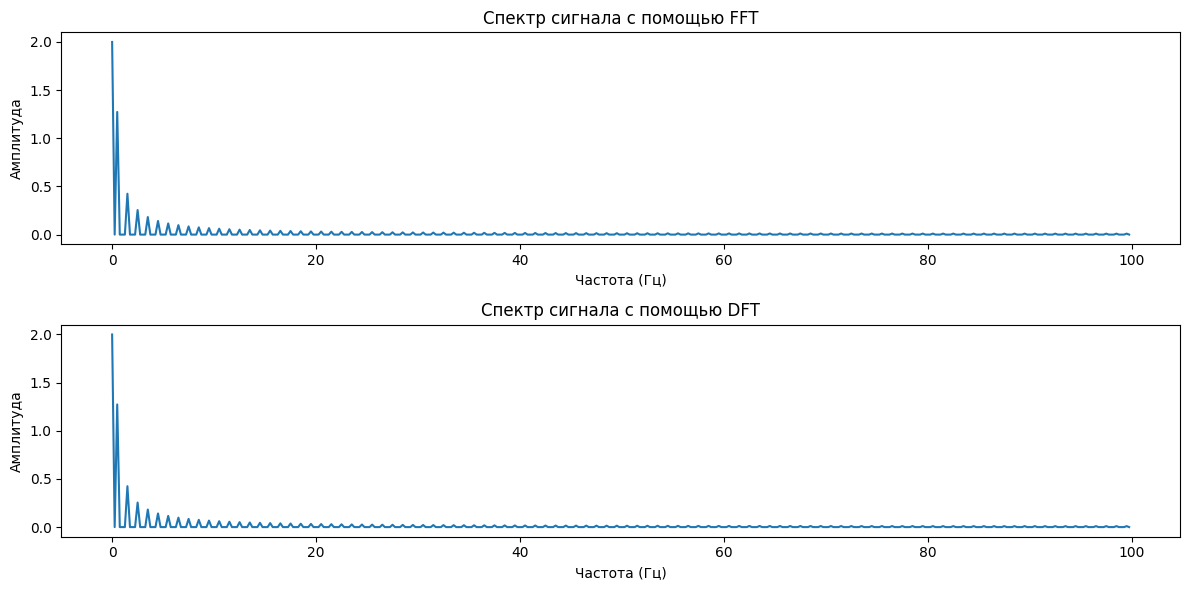

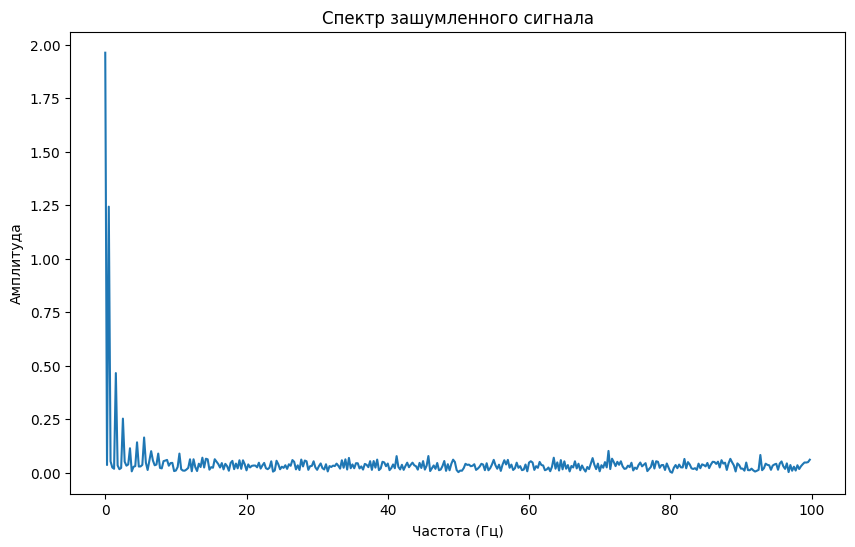

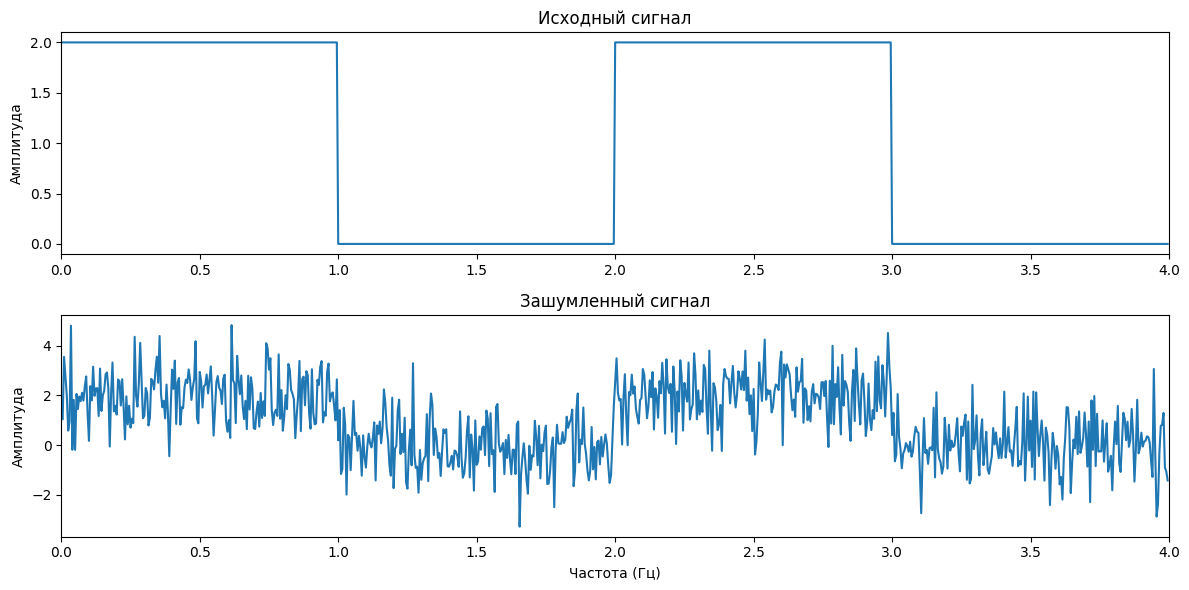

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import time

# Параметры сигнала
sampling_frequency = 200  # Частота дискретизации (Гц)
sampling_period = 1.0 / sampling_frequency
duration = 4
t = np.arange(0, duration, sampling_period)  # Временная ось

amplitude = 2
period = 2

# Создание прямоугольного импульсного сигнала
def rectangular_pulse(t, amplitude, period):
    return amplitude * (np.floor(t % period) < period/2).astype(float)

signal = rectangular_pulse(t, amplitude, period)

# Быстрое преобразование Фурье (FFT)
start_time_fft = time.time()
fft_signal = fft(signal)
fft_time = time.time() - start_time_fft

# Функция для ручного вычисления дискретного преобразования Фурье (DFT)
def DFT_show(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

start_time_dft = time.time()
dft_signal = DFT_show(signal)
dft_time = time.time() - start_time_dft

# Сравнение времени вычисления
print(f"FFT computation time: {fft_time} seconds")
print(f"DFT computation time: {dft_time} seconds")

# Построение спектра
frequencies = np.fft.fftfreq(len(t), sampling_period)

# Нормализация и отображение спектра
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal[:len(fft_signal)//2]) * 2 / len(t))
plt.title('Спектр сигнала с помощью FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(dft_signal[:len(dft_signal)//2]) * 2 / len(t))
plt.title('Спектр сигнала с помощью DFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

# Добавление белого шума
noisy_signal = signal + np.random.normal(0, 0.5, signal.shape)  # Нормальное распределение для шума

# Спектр зашумленного сигнала
fft_noisy_signal = fft(noisy_signal)

# Построение спектра зашумленного сигнала
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_noisy_signal[:len(fft_noisy_signal)//2]) * 2 / len(t))
plt.title("Спектр зашумленного сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label="")
plt.xlim(0, duration)
plt.title("Исходный сигнал")
plt.ylabel("Амплитуда")
# plt.ylabel("Амплитуда")

# Инверсное преобразование зашумленного сигнала
noisy_signal = signal + np.random.normal(0, 1, signal.shape)
fft_noisy_signal = fft(noisy_signal)
recovered_noisy_signal = ifft(fft_noisy_signal)


plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal, label="")
plt.xlim(0, duration)
plt.title("Зашумленный сигнал")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.tight_layout()
plt.show()


3)

Время выполнения встроенного FFT: 0.000000 секунд
Время выполнения моего рекурсивного FFT: 0.285658 секунд


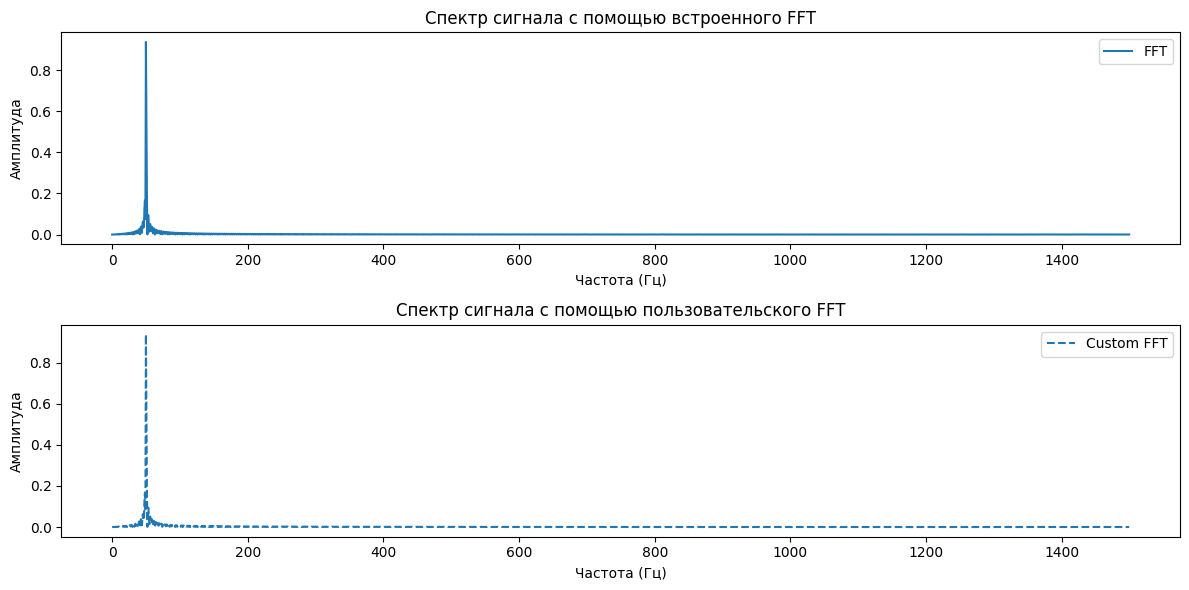

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time

def my_fft(x):
  N = len(x)
  if N <= 1:
    return x
  
  # Разбиение на четные и нечетные элементы
  even = my_fft(x[::2])
  odd = my_fft(x[1::2])
  
  # Коэффициенты
  factor = np.exp(-2j * np.pi * np.arange(N) / N)
  combined = np.zeros(N, dtype=complex)
  for k in range(N // 2):
    combined[k] = even[k] + factor[k] * odd[k]
    combined[k + N // 2] = even[k] - factor[k] * odd[k]
  
  return combined

# Сравнение времени выполнения
def compare_fft_times(signal):
  start_time_fft = time.time()
  fft_result = np.fft.fft(signal)
  fft_time = time.time() - start_time_fft

  start_time_custom_fft = time.time()
  custom_fft_result = my_fft(signal)
  custom_fft_time = time.time() - start_time_custom_fft

  print(f"Время выполнения встроенного FFT: {fft_time:.6f} секунд")
  print(f"Время выполнения моего рекурсивного FFT: {custom_fft_time:.6f} секунд")

  return fft_result, custom_fft_result

# Параметры сигнала
sampling_frequency = 2000
sampling_period = 1.0 / sampling_frequency
duration = 1
t = np.arange(0, duration, sampling_period)

frequency = 50
signal = np.cos(2 * np.pi * frequency * t)

# Убедимся, что длина сигнала является степенью двойки
N = len(signal)
if (N & (N - 1)) != 0:
  N_padded = 2**int(np.ceil(np.log2(N)))
  signal = np.pad(signal, (0, N_padded - N), mode='constant')

fft_result, custom_fft_result = compare_fft_times(signal)

# Построение спектра
frequencies = np.fft.fftfreq(len(signal), sampling_period)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result[:len(fft_result)//2] * 2 / len(t)), label='FFT')
plt.title('Спектр сигнала с помощью встроенного FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(custom_fft_result[:len(custom_fft_result)//2] * 2 / len(t)), label='Custom FFT', linestyle='--')
plt.title('Спектр сигнала с помощью пользовательского FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()
